# Jaffle Shop Data Analysis - Final Project

## Instructions
You have been hired as a data analyst for Jaffle Shop, a growing chain of gourmet toasted sandwich restaurants. The executive team needs insights to make strategic business decisions.

Using the provided datasets and Python Polars, analyze the business performance and provide data-driven recommendations. You must use Polars for all data manipulation and analysis.

## Available Data
- `Customers.csv`: Customer information
- `Orders.csv`: Order transactions with totals and timestamps
- `Items.csv`: Individual items within each order
- `Products.csv`: Product catalog with prices and descriptions
- `Stores.csv`: Store locations and opening dates
- `Supplies.csv`: Supply costs for each product

**Time Limit: 90 minutes**

## Setup and Data Loading

In [ ]:
# Import necessary libraries
import polars as pl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
# Load all datasets

# Import necessary libraries
import polars as pl
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')

# Base URL for the raw CSVs
base_url = "https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-4/main/data/"

# Load datasets directly from GitHub
customers = pl.read_csv(base_url + "Customers.csv")
orders    = pl.read_csv(base_url + "Orders.csv")
items     = pl.read_csv(base_url + "Items.csv")
products  = pl.read_csv(base_url + "Products.csv")
stores    = pl.read_csv(base_url + "Stores.csv")
supplies  = pl.read_csv(base_url + "Supplies.csv")

# Display basic information about each dataset
print("Dataset shapes:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Stores: {stores.shape}")
print(f"Supplies: {supplies.shape}")

Dataset shapes:
Customers: (932, 2)
Orders: (63148, 7)
Items: (90184, 3)
Products: (10, 5)
Stores: (6, 4)
Supplies: (65, 5)


## Question 1: Revenue Performance Analysis

The CFO wants to understand the company's financial performance across different dimensions. Analyze:
- What is the total revenue generated by Jaffle Shop? (Store result in variable: `total_revenue`)
- How does revenue vary by store location? (Store result in variable: `revenue_by_store`)
- What are the monthly revenue trends? (Store result in variable: `monthly_revenue_trends`)
- Which day of the week generates the most revenue? (Store result in variable: `revenue_by_day_of_week`)
- Include at least one chart for one of these questions

In [ ]:
# Q1.1: Calculate total revenue

total_revenue = orders.select(pl.col("order_total").sum()).item()

print(f"Total Revenue: {total_revenue}")

Total Revenue: 66038193


In [ ]:
# Q1.2: Revenue by store location

# Import necessary libraries
import polars as pl

# Base URL for the raw CSVs
base_url = "https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-4/main/data/"

# Load datasets directly from GitHub
orders    = pl.read_csv(base_url + "Orders.csv")
stores    = pl.read_csv(base_url + "Stores.csv")

# Calculate revenue per store
revenue_by_store = (
    orders.group_by("store_id")
    .agg(pl.sum("order_total").alias("total_revenue"))
)

# Join with stores DataFrame to get store names
revenue_by_store = revenue_by_store.join(stores.select(["id", "name"]), left_on="store_id", right_on="id", how="left")

# Select and reorder columns for display
revenue_by_store = revenue_by_store.select([ "store_id", "name", "total_revenue"])

# Print result
print("Revenue by Store Location:")
print(revenue_by_store)

Revenue by Store Location:
shape: (2, 3)
┌─────────────────────────────────┬──────────────┬───────────────┐
│ store_id                        ┆ name         ┆ total_revenue │
│ ---                             ┆ ---          ┆ ---           │
│ str                             ┆ str          ┆ i64           │
╞═════════════════════════════════╪══════════════╪═══════════════╡
│ a9128331-08d7-41a2-b615-21283e… ┆ Philadelphia ┆ 43215565      │
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ Brooklyn     ┆ 22822628      │
└─────────────────────────────────┴──────────────┴───────────────┘


Monthly Revenue Trends:
shape: (12, 2)
┌─────────────┬───────────────┐
│ order_month ┆ total_revenue │
│ ---         ┆ ---           │
│ str         ┆ i64           │
╞═════════════╪═══════════════╡
│ 2016-09     ┆ 1644922       │
│ 2016-10     ┆ 1956651       │
│ 2016-11     ┆ 2552662       │
│ 2016-12     ┆ 3307337       │
│ 2017-01     ┆ 3821291       │
│ …           ┆ …             │
│ 2017-04     ┆ 7392014       │
│ 2017-05     ┆ 8469909       │
│ 2017-06     ┆ 8617148       │
│ 2017-07     ┆ 8585320       │
│ 2017-08     ┆ 9332296       │
└─────────────┴───────────────┘


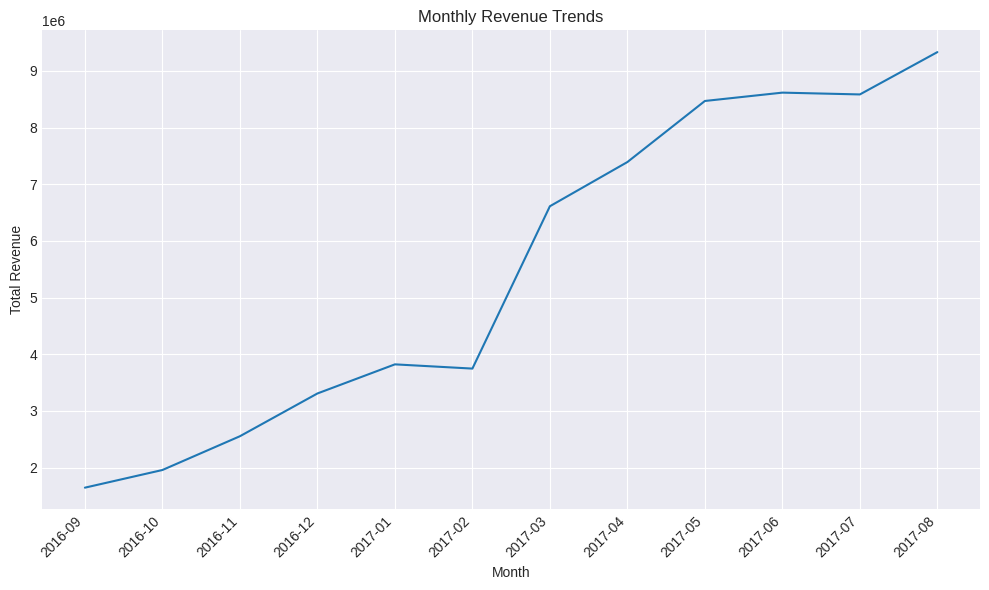

In [ ]:
# Q1.3: Monthly revenue trends
# Convert 'ordered_at' to datetime and extract month and year
orders_with_month = orders.with_columns(
    pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date).alias("order_date")
).with_columns(
    pl.col("order_date").dt.strftime("%Y-%m").alias("order_month")
)

# Calculate monthly revenue
monthly_revenue_trends = (
    orders_with_month.group_by("order_month")
    .agg(pl.sum("order_total").alias("total_revenue"))
    .sort("order_month") # Sort by month for time series
)

print("Monthly Revenue Trends:")
print(monthly_revenue_trends)

# Chart: Monthly Revenue Trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_trends["order_month"], monthly_revenue_trends["total_revenue"])
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Revenue by Day of Week:
shape: (7, 2)
┌───────────────────┬───────────────┐
│ order_day_of_week ┆ total_revenue │
│ ---               ┆ ---           │
│ str               ┆ i64           │
╞═══════════════════╪═══════════════╡
│ Monday            ┆ 10611971      │
│ Tuesday           ┆ 10814455      │
│ Wednesday         ┆ 10834569      │
│ Thursday          ┆ 10829195      │
│ Friday            ┆ 10758715      │
│ Saturday          ┆ 5981489       │
│ Sunday            ┆ 6207799       │
└───────────────────┴───────────────┘


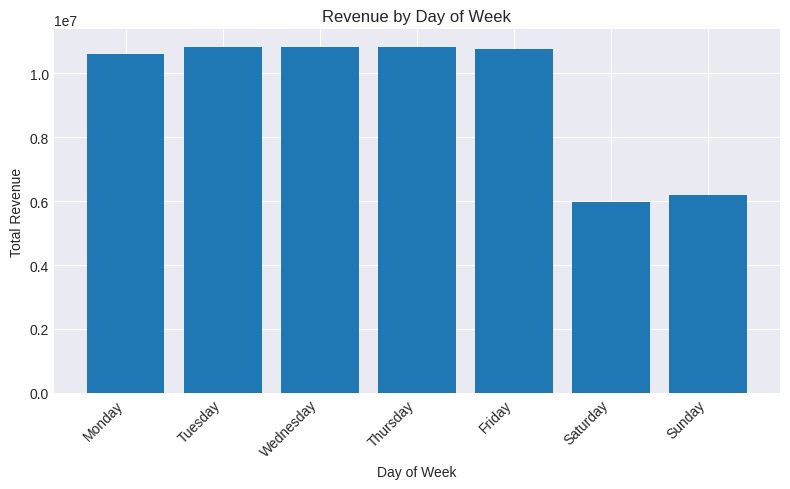

In [ ]:
# Q1.4: Revenue by day of week
# Convert 'ordered_at' to datetime and extract the day of the week
orders_with_day = orders.with_columns(
    pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date).alias("order_date")
).with_columns(
    pl.col("order_date").dt.strftime("%A").alias("order_day_of_week") # %A gives the full weekday name
)

# Define the order of the days of the week for sorting
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Calculate revenue by day of the week
revenue_by_day_of_week = (
    orders_with_day.group_by("order_day_of_week")
    .agg(pl.sum("order_total").alias("total_revenue"))
)

# Create a numerical order column based on the weekday_order list
weekday_order_expr = pl.when(pl.col("order_day_of_week") == "Monday").then(0)\
                       .when(pl.col("order_day_of_week") == "Tuesday").then(1)\
                       .when(pl.col("order_day_of_week") == "Wednesday").then(2)\
                       .when(pl.col("order_day_of_week") == "Thursday").then(3)\
                       .when(pl.col("order_day_of_week") == "Friday").then(4)\
                       .when(pl.col("order_day_of_week") == "Saturday").then(5)\
                       .when(pl.col("order_day_of_week") == "Sunday").then(6)\
                       .otherwise(None).alias("weekday_order")

revenue_by_day_of_week = revenue_by_day_of_week.with_columns(weekday_order_expr).sort("weekday_order").drop("weekday_order")


print("Revenue by Day of Week:")
print(revenue_by_day_of_week)

# Chart: Revenue by Day of Week
plt.figure(figsize=(8, 5))
plt.bar(revenue_by_day_of_week["order_day_of_week"], revenue_by_day_of_week["total_revenue"])
plt.title("Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Question 2: Product Performance

The Product Manager needs insights about the menu items:
- What is the revenue contribution of each product category (jaffles vs beverages)? (Store result in variable: `revenue_by_category`)
- What is the average price of products by type (jaffles vs beverages)?
- Include at least one chart to answer one of the above questions.

Revenue by Product Category:
beverage: $95,183,881.00
jaffle: $62,031,556.00


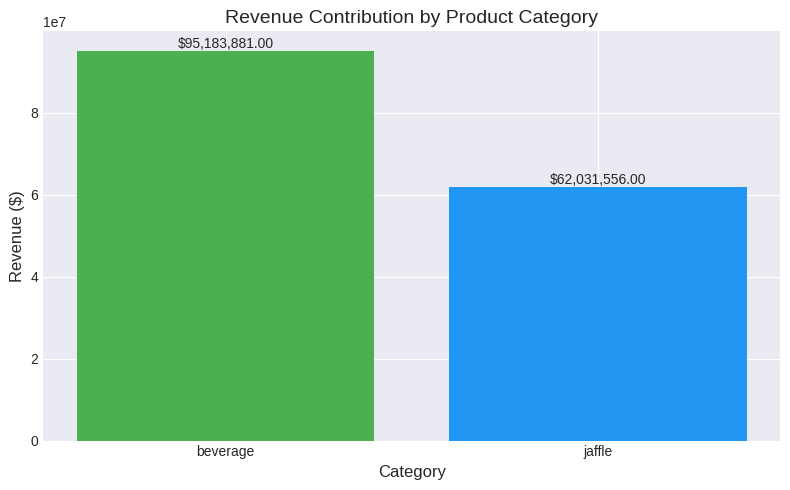

In [ ]:
# Q2.1: Revenue by product category
# Your code here
revenue_by_category = (
    items.join(orders.select(["id", "order_total"]), left_on="order_id", right_on="id", how="left")
    .join(products.select(["sku", "type"]), left_on="sku", right_on="sku", how="left")
    .group_by("type")
    .agg(pl.sum("order_total").alias("revenue"))
    .sort("revenue", descending=True)
)

print("Revenue by Product Category:")
for row in revenue_by_category.iter_rows(named=True):
    print(f"{row['type']}: ${row['revenue']:,.2f}")

categories = revenue_by_category["type"].to_list()
revenues = revenue_by_category["revenue"].to_list()

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, revenues, color=["#4CAF50", "#2196F3"])
plt.title("Revenue Contribution by Product Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)

for bar, rev in zip(bars, revenues):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"${rev:,.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Q2.2 Average price of products by type
# Your code here
jaffles_filtered = products.filter(pl.col("type") == "jaffle")
avg_price_jaffles = jaffles_filtered["price"].mean()

beverages_filtered = products.filter(pl.col("type") == "beverage")
avg_price_beverages = beverages_filtered["price"].mean()

print(f"Average price of jaffles: {avg_price_jaffles}")
print(f"Average price of beverages: {avg_price_beverages}")


Average price of jaffles: 1200.0
Average price of beverages: 560.0


## Question 3: Store Expansion Strategy

The Operations Director is planning expansion strategies:
- Which stores have the highest revenue per day since opening? (Store result in variable: `revenue_per_day_by_store`)
- What is the relationship between local tax rates and store performance? (Store result in variable: `tax_rate_performance`)
- Include at least one chart to answer one of the above questions.

shape: (2, 5)
┌─────────────────────────────────┬──────────────┬───────────────┬────────────┬─────────────────┐
│ store_id                        ┆ name         ┆ total_revenue ┆ total_days ┆ revenue_per_day │
│ ---                             ┆ ---          ┆ ---           ┆ ---        ┆ ---             │
│ str                             ┆ str          ┆ i64           ┆ i64        ┆ f64             │
╞═════════════════════════════════╪══════════════╪═══════════════╪════════════╪═════════════════╡
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ Brooklyn     ┆ 55251753      ┆ 173        ┆ 319374.294798   │
│ a9128331-08d7-41a2-b615-21283e… ┆ Philadelphia ┆ 101963684     ┆ 365        ┆ 279352.558904   │
└─────────────────────────────────┴──────────────┴───────────────┴────────────┴─────────────────┘


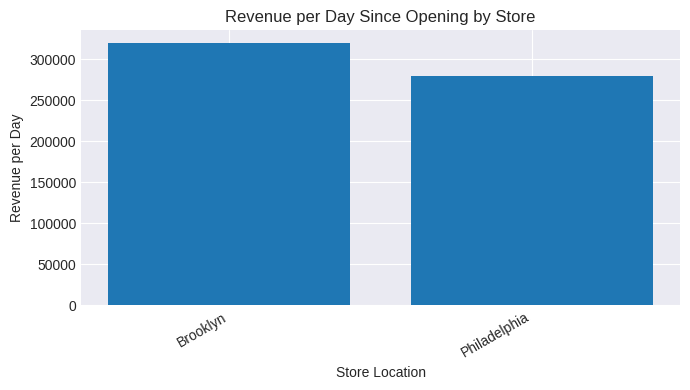

In [ ]:
# Q3.1: Revenue per day since opening by store

# Join items with orders to get the order_total and store_id
order_details = (
    items
    .join(orders.select(["id", "store_id", "ordered_at", "order_total"]), left_on="order_id", right_on="id", how="left")
)

# Rename 'id' column in stores to 'store_id' for joining
stores_renamed = stores.rename({"id": "store_id"})

# Join with store data
line_items_with_store = order_details.join(stores_renamed.select(["store_id", "opened_at", "name"]), on="store_id", how="left")

# Convert 'ordered_at' and 'opened_at' to datetime
line_items_with_store = line_items_with_store.with_columns([
    pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date).alias("order_date"),
    pl.col("opened_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date).alias("opening_date")
])

# Compute days since opening for each order
line_items_with_store = line_items_with_store.with_columns(
    ((pl.col("order_date") - pl.col("opening_date")).dt.total_days().cast(pl.Int64) + 1)
    .alias("days_since_opening")
)

# Revenue per store / per day since opening
revenue_per_day_by_store = (
    line_items_with_store.group_by(["store_id", "name"])
    .agg([
        pl.col("order_total").sum().alias("total_revenue"),
        pl.col("days_since_opening").max().alias("total_days")
    ])
    .with_columns((pl.col("total_revenue") / pl.col("total_days")).alias("revenue_per_day"))
    .sort("revenue_per_day", descending=True)
)

print(revenue_per_day_by_store)

# Chart: Revenue per day by store
plt.figure(figsize=(7,4))
plt.bar(revenue_per_day_by_store["name"], revenue_per_day_by_store["revenue_per_day"])
plt.title("Revenue per Day Since Opening by Store")
plt.xlabel("Store Location")
plt.ylabel("Revenue per Day")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

shape: (2, 3)
┌─────────────────────────────────┬───────────────┬──────────┐
│ store_id                        ┆ total_revenue ┆ tax_rate │
│ ---                             ┆ ---           ┆ ---      │
│ str                             ┆ i64           ┆ f64      │
╞═════════════════════════════════╪═══════════════╪══════════╡
│ a9128331-08d7-41a2-b615-21283e… ┆ 43215565      ┆ 0.06     │
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ 22822628      ┆ 0.04     │
└─────────────────────────────────┴───────────────┴──────────┘


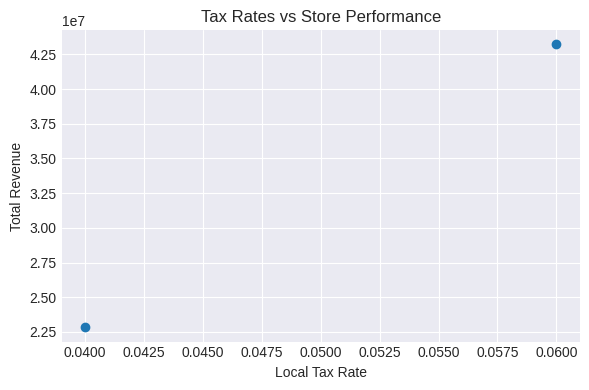

In [ ]:
# Q3.2: Tax rates vs store performance

# Merge tax_rate with total revenue per store
tax_rate_performance = (
    orders.group_by("store_id")
    .agg(pl.sum("order_total").alias("total_revenue"))
    .join(stores.select(["id", "tax_rate"]), left_on="store_id", right_on="id", how="left")
)

print(tax_rate_performance)

# Chart: Tax rate vs Revenue
plt.figure(figsize=(6,4))
plt.scatter(tax_rate_performance["tax_rate"], tax_rate_performance["total_revenue"])
plt.title("Tax Rates vs Store Performance")
plt.xlabel("Local Tax Rate")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


## Question 4: Customer Behavior Analysis

The Marketing Manager wants to understand customer patterns:
- What is the distribution of order values? (Store result in variable: `order_value_distribution`)
- How many customers are repeat customers? (Store result in variable: `repeat_customer_analysis`)
- Which customers contribute the most to revenue? (Store result in variable: `top_revenue_customers`)

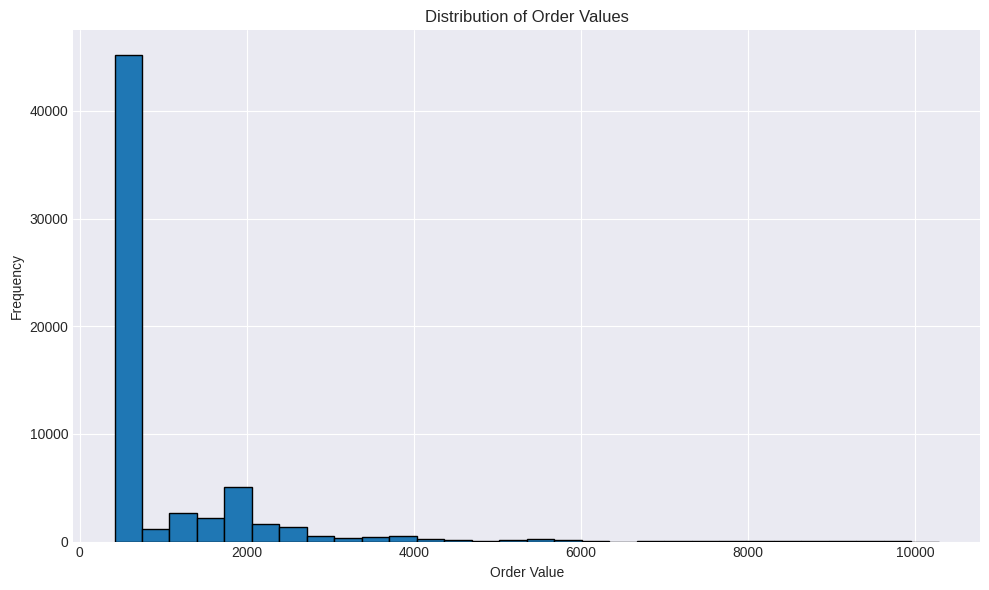

In [ ]:
# Q4.1: Distribution of order values

# Join items with products to get the price of each item
items_with_price = items.join(products.select(["sku", "price"]), on="sku", how="left")

# Join the result with orders to get the order_id and order_total
order_items_with_total = items_with_price.join(orders.select(["id", "order_total"]), left_on="order_id", right_on="id", how="left")

# Calculate the order value for each order by summing the order_total
order_values = (
    order_items_with_total.group_by("order_id")
    .agg(pl.col("order_total").first().alias("order_value")) # Use .first() as order_total is the same for all items in an order
)

order_value_distribution = order_values["order_value"]

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(order_value_distribution, bins=30, edgecolor='black')
plt.title("Distribution of Order Values")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# Q4.2: Repeat customers analysis

# Join orders with customers to get customer information
orders_customers = orders.join(customers, left_on="customer", right_on="id", how="left")

repeat_customer_analysis = (
    orders_customers.group_by("id") # Changed from "customer_id" to "id"
    .agg(pl.len().alias("num_orders")) # Changed from pl.count() to pl.len()
    .with_columns((pl.col("num_orders") > 1).alias("is_repeat"))
    .group_by("is_repeat")
    .agg(pl.len().alias("num_customers")) # Changed from pl.count() to pl.len()
)
print(repeat_customer_analysis)

shape: (2, 2)
┌───────────┬───────────────┐
│ is_repeat ┆ num_customers │
│ ---       ┆ ---           │
│ bool      ┆ u32           │
╞═══════════╪═══════════════╡
│ false     ┆ 63022         │
│ true      ┆ 126           │
└───────────┴───────────────┘


Top 10 Revenue-Contributing Customers:
shape: (10, 2)
┌─────────────────────────────────┬──────────────────┐
│ id                              ┆ customer_revenue │
│ ---                             ┆ ---              │
│ str                             ┆ i64              │
╞═════════════════════════════════╪══════════════════╡
│ ab308e57-e876-48ca-91bf-a80acf… ┆ 10281            │
│ 6f0de4f5-6315-422d-9085-488ca0… ┆ 10176            │
│ 4075265c-ba57-4149-95e4-95f802… ┆ 9964             │
│ 156ce168-b046-49be-9543-b71a35… ┆ 9880             │
│ 719a176d-5ff1-4210-b2c8-a74baf… ┆ 9858             │
│ 46582e45-854d-4d24-b068-c4440a… ┆ 9858             │
│ ad7515f1-e25b-459d-904f-cfcaa2… ┆ 9858             │
│ df68a3e4-2091-4470-a5e7-982680… ┆ 9776             │
│ 0752dc6f-1cd7-4c79-b69e-7d9d66… ┆ 9776             │
│ b4b64604-1fc9-48f2-8675-3e1082… ┆ 9776             │
└─────────────────────────────────┴──────────────────┘


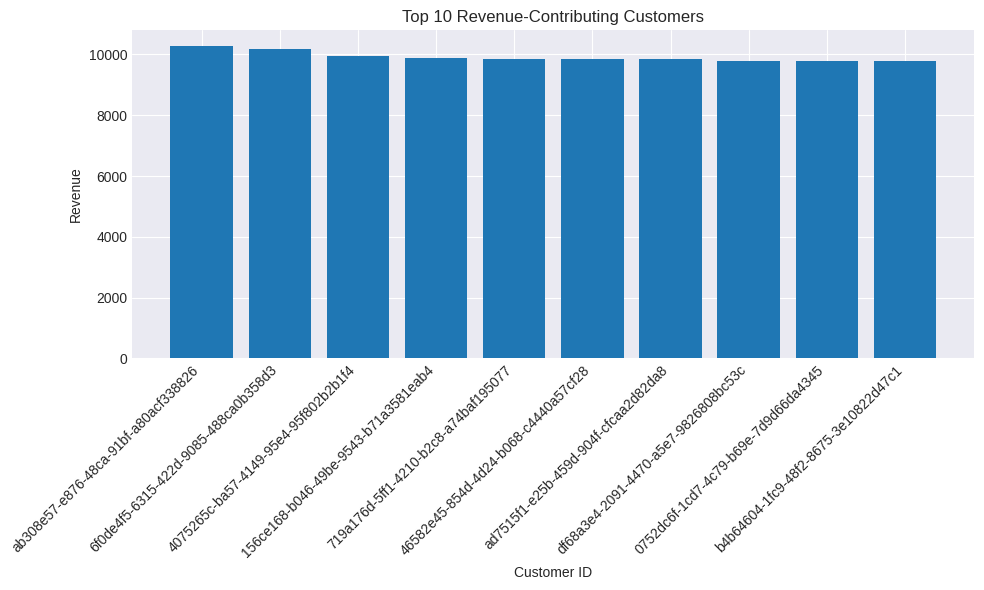

In [ ]:
# Q4.3: Top revenue contributors
top_revenue_customers = (
    orders_customers.group_by("id")
    .agg(pl.col("order_total").sum().alias("customer_revenue"))
    .sort("customer_revenue", descending=True)
    .limit(10)
)

print("Top 10 Revenue-Contributing Customers:")
print(top_revenue_customers)

# Plot top customers
plt.figure(figsize=(10, 6))
plt.bar(top_revenue_customers["id"].cast(pl.Utf8), top_revenue_customers["customer_revenue"])
plt.title("Top 10 Revenue-Contributing Customers")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Question 5: Profitability Deep Dive

The CEO needs a comprehensive profitability analysis:
- Calculate the gross margin for each product (consider supply costs) (Store result in variable: `product_margins`)
- Which products have the highest profit margins? (Store result in variable: `highest_margin_products`)
- What is the relationship between order size and profitability? (Store result in variable: `order_size_profitability`)
- How does profitability vary across different stores? (Store result in variable: `store_profitability`)

In [ ]:
# Q5.1: Calculate gross margin per product

# Calculate revenue per item
items_with_revenue = items.join(products.select(["sku", "price", "name", "type"]), on="sku", how="left").with_columns(
    (pl.col("price")).alias("revenue") # Assuming price is the revenue per item
)

# Calculate cost of goods sold (COGS) per item
# Join items with supplies to get the cost of each supply item for each product
items_with_supplies_cost = items.join(supplies.select(["sku", "cost"]), on="sku", how="left")

# Group by item id and sum the supply costs to get the total supply cost per item
item_cogs = items_with_supplies_cost.group_by("id").agg(pl.col("cost").sum().alias("cogs"))

# Join revenue data with COGS data
items_with_profit = items_with_revenue.join(item_cogs, on="id", how="left").with_columns(
    (pl.col("revenue") - pl.col("cogs")).alias("gross_profit")
)

# Aggregate by product to calculate gross margin
product_margins = (
    items_with_profit
    .group_by(["sku", "name", "type"])
    .agg([
        pl.len().alias("units_sold"), # Count the number of items
        pl.col("revenue").sum().alias("total_revenue"),
        pl.col("cogs").sum().alias("total_cogs"),
        pl.col("gross_profit").sum().alias("total_gross_profit"),
    ])
    .with_columns([
        (pl.col("total_gross_profit") / pl.col("total_revenue")).alias("margin_pct"),
        (pl.col("total_revenue") / pl.col("units_sold")).alias("avg_price_realized"),
        (pl.col("total_cogs") / pl.col("units_sold")).alias("avg_unit_cost"),
    ])
    .sort("margin_pct", descending=True)
)

print("Gross Margin per Product:")
print(product_margins)

Gross Margin per Product:
shape: (10, 10)
┌─────────┬────────────┬──────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ sku     ┆ name       ┆ type     ┆ units_sold ┆ … ┆ total_gro ┆ margin_pc ┆ avg_price ┆ avg_unit_ │
│ ---     ┆ ---        ┆ ---      ┆ ---        ┆   ┆ ss_profit ┆ t         ┆ _realized ┆ cost      │
│ str     ┆ str        ┆ str      ┆ u32        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆            ┆          ┆            ┆   ┆ i64       ┆ f64       ┆ f64       ┆ f64       │
╞═════════╪════════════╪══════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ JAF-001 ┆ nutellapho ┆ jaffle   ┆ 3810       ┆ … ┆ 3729990   ┆ 0.89      ┆ 1100.0    ┆ 121.0     │
│         ┆ ne who     ┆          ┆            ┆   ┆           ┆           ┆           ┆           │
│         ┆ dis?       ┆          ┆            ┆   ┆           ┆           ┆           ┆           │
│ BEV-004 ┆ for richer ┆ beverage ┆ 14217      ┆ 

In [ ]:
# Q5.2: Products with highest profit margins

highest_margins = (
    product_margins
    .sort(by=["margin_pct","total_gross_profit"], descending=[True,True])
    .head(5))
highest_margins

sku,name,type,units_sold,total_revenue,total_cogs,total_gross_profit,margin_pct,avg_price_realized,avg_unit_cost
str,str,str,u32,i64,i64,i64,f64,f64,f64
"""JAF-001""","""nutellaphone who dis?""","""jaffle""",3810,4191000,461010,3729990,0.89,1100.0,121.0
"""BEV-004""","""for richer or pourover ""","""beverage""",14217,9951900,1165794,8786106,0.882857,700.0,82.0
"""BEV-001""","""tangaroo""","""beverage""",14371,8622600,1178586,7444014,0.863314,600.0,82.011412
"""BEV-005""","""adele-ade""","""beverage""",14057,5622800,885591,4737209,0.8425,400.0,63.0
"""JAF-005""","""mel-bun""","""jaffle""",3824,4588800,913936,3674864,0.800833,1200.0,239.0


In [ ]:
# Q5.3: Order size vs profitability

order_size_profitability = (
    items_with_profit # Changed from fact_items to items_with_profit
    .group_by("order_id")
    .agg([
        pl.len().alias("order_size"), # Calculate order size by counting items in each order
        pl.col("revenue").sum().alias("revenue"),
        pl.col("gross_profit").sum().alias("gross_profit"),
    ])
    .group_by("order_size")
    .agg([
        pl.len().alias("orders"),
        pl.col("revenue").sum().alias("total_revenue"),
        pl.col("gross_profit").sum().alias("total_profit"),
        pl.col("gross_profit").mean().alias("avg_profit_per_order"),
    ])
    .sort("order_size")
)
order_size_profitability

order_size,orders,total_revenue,total_profit,avg_profit_per_order
u32,u32,i64,i64,f64
1,45761,26006500,20834444,455.288215
2,11805,18842100,14882841,1260.723507
3,2668,6627000,5214630,1954.508996
4,1151,4040800,3172096,2755.947871
5,315,1365500,1074321,3410.542857
6,578,3054900,2398729,4150.050173
8,239,1684300,1328611,5559.041841
10,125,1096000,860665,6885.32


In [ ]:
# Q5.4: Profitability by store

store_profitability = (
    items_with_profit
    .join(orders.select(["id", "store_id"]), left_on="order_id", right_on="id", how="left")
    .join(stores.select(["id", "name"]), left_on="store_id", right_on="id", how="left")
    .group_by(["store_id","name"])
    .agg([
        pl.len().alias("items_sold"), # Count the number of items sold in each store
        pl.col("revenue").sum().alias("revenue"),
        pl.col("cogs").sum().alias("cogs"),
        pl.col("gross_profit").sum().alias("gross_profit"),])
    .with_columns([
        (pl.col("gross_profit")/pl.col("revenue")).alias("margin_pct"),
        (pl.col("gross_profit")/pl.col("items_sold")).alias("avg_profit_per_item"), # Changed from orders to items_sold
    ])
    .sort("gross_profit", descending=True))
store_profitability

store_id,name,items_sold,revenue,cogs,gross_profit,margin_pct,avg_profit_per_item
str,str,u32,i64,i64,i64,f64,f64
"""a9128331-08d7-41a2-b615-21283e…","""for richer or pourover """,9195,6436500,753990,5682510,0.882857,618.0
"""a9128331-08d7-41a2-b615-21283e…","""tangaroo""",9366,5619600,768176,4851424,0.863304,517.98249
"""a9128331-08d7-41a2-b615-21283e…","""vanilla ice""",9036,5421600,1391544,4030056,0.743333,446.0
"""a2a24e87-dec8-4f5d-9c9e-0e9849…","""for richer or pourover """,5022,3515400,411804,3103596,0.882857,618.0
"""a9128331-08d7-41a2-b615-21283e…","""adele-ade""",9010,3604000,567630,3036370,0.8425,337.0
…,…,…,…,…,…,…,…
"""a2a24e87-dec8-4f5d-9c9e-0e9849…","""flame impala""",1251,1751400,429093,1322307,0.755,1057.0
"""a2a24e87-dec8-4f5d-9c9e-0e9849…","""mel-bun""",1334,1600800,318826,1281974,0.800833,961.0
"""a2a24e87-dec8-4f5d-9c9e-0e9849…","""nutellaphone who dis?""",1305,1435500,157905,1277595,0.89,979.0


## Question 6: Business Optimization Recommendations

Based on your analysis, provide three specific, data-driven recommendations to improve business performance. Support each recommendation with relevant metrics and visualizations.

### Recommendation 1:

Drive Growth Through Weekday Performance and Larger Baskets


Weekday revenue: 43,090,190 | Weekend revenue: 22,948,003 | Weekday/Weekend ratio: 1.88x


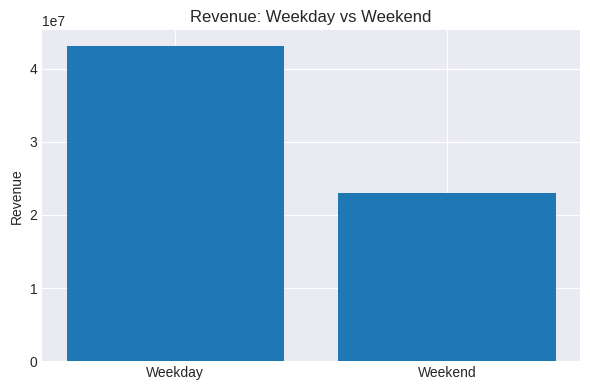


Average profit per order by basket size:
shape: (66, 3)
┌────────────┬────────┬──────────────────────┐
│ order_size ┆ orders ┆ avg_profit_per_order │
│ ---        ┆ ---    ┆ ---                  │
│ u32        ┆ u32    ┆ f64                  │
╞════════════╪════════╪══════════════════════╡
│ 4          ┆ 9099   ┆ 2718.0               │
│ 5          ┆ 27013  ┆ 2572.998445          │
│ 6          ┆ 9116   ┆ 2825.0               │
│ 7          ┆ 216    ┆ 7517.611111          │
│ 8          ┆ 228    ┆ 7312.425439          │
│ …          ┆ …      ┆ …                    │
│ 67         ┆ 16     ┆ 61309.9375           │
│ 68         ┆ 15     ┆ 64525.866667         │
│ 69         ┆ 5      ┆ 66572.8              │
│ 70         ┆ 1      ┆ 70041.0              │
│ 73         ┆ 1      ┆ 69803.0              │
└────────────┴────────┴──────────────────────┘


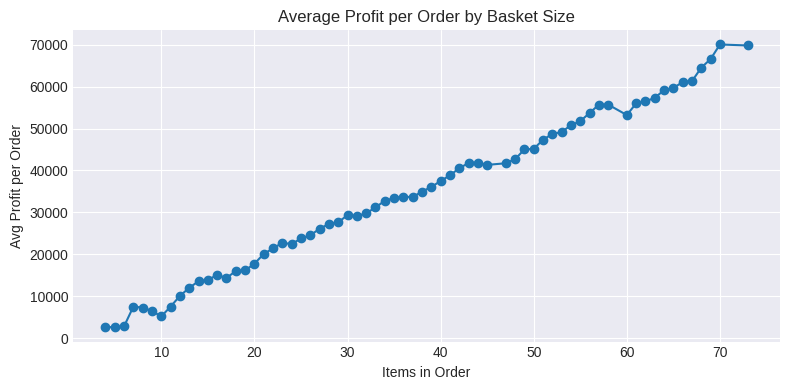

In [ ]:
#Drive Growth Through Weekday Performance and Larger Baskets

def add_order_date(df: pl.DataFrame, date_col="ordered_at", out_col="order_date"):
    return df.with_columns(
        pl.col(date_col)
          .str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S")
          .cast(pl.Date)
          .alias(out_col)
    )

sku_price = products.select(["sku","price","type"])
sku_cost  = supplies.select(["sku","cost"]).rename({"cost":"unit_cost"})
items_with_profit = (
    items
    .join(sku_price, on="sku", how="left")
    .join(sku_cost,  on="sku", how="left")
    .with_columns((pl.col("price") - pl.col("unit_cost")).alias("gross_profit"))
)

orders_with_day = (
    add_order_date(orders)
    .with_columns([
        pl.col("order_date").dt.strftime("%A").alias("weekday"),
        pl.when(pl.col("order_date").dt.weekday() >= 5)
          .then(pl.lit("Weekend"))
          .otherwise(pl.lit("Weekday"))
          .alias("bucket")
    ])
)

wk_vs_wknd = (
    orders_with_day
    .group_by("bucket")
    .agg(pl.sum("order_total").alias("revenue"))
    .sort("bucket")
)

wkdy = wk_vs_wknd.filter(pl.col("bucket")=="Weekday").select("revenue").to_series().item()
wknd = wk_vs_wknd.filter(pl.col("bucket")=="Weekend").select("revenue").to_series().item()
ratio = wkdy / wknd if wknd else float("inf")
print(f"Weekday revenue: {wkdy:,.0f} | Weekend revenue: {wknd:,.0f} | Weekday/Weekend ratio: {ratio:.2f}x")

plt.figure(figsize=(6,4))
plt.bar(wk_vs_wknd["bucket"], wk_vs_wknd["revenue"])
plt.title("Revenue: Weekday vs Weekend")
plt.ylabel("Revenue")
plt.tight_layout(); plt.show()

profit_by_order = (
    items_with_profit
    .group_by("order_id")
    .agg([
        pl.len().alias("order_size"),
        pl.sum("gross_profit").alias("order_profit")
    ])
)

order_size_profitability = (
    profit_by_order
    .group_by("order_size")
    .agg([
        pl.len().alias("orders"),
        pl.mean("order_profit").alias("avg_profit_per_order")
    ])
    .sort("order_size")
)
print("\nAverage profit per order by basket size:")
print(order_size_profitability)

plt.figure(figsize=(8,4))
plt.plot(order_size_profitability["order_size"], order_size_profitability["avg_profit_per_order"], marker="o")
plt.title("Average Profit per Order by Basket Size")
plt.xlabel("Items in Order"); plt.ylabel("Avg Profit per Order")
plt.tight_layout(); plt.show()


### Recommendation 2:

Promote High-Margin “Hero” Products through Bundles



Top 10 Highest-Margin Products:
nutellaphone who dis? (JAF-001) | GM%: 89.0% | Unit Margin: $9.79
for richer or pourover  (BEV-004) | GM%: 88.3% | Unit Margin: $6.18
tangaroo (BEV-001) | GM%: 86.3% | Unit Margin: $5.18
adele-ade (BEV-005) | GM%: 84.2% | Unit Margin: $3.37
mel-bun (JAF-005) | GM%: 80.1% | Unit Margin: $9.61
doctor stew (JAF-002) | GM%: 77.2% | Unit Margin: $8.49
flame impala (JAF-004) | GM%: 75.5% | Unit Margin: $10.57
vanilla ice (BEV-003) | GM%: 74.3% | Unit Margin: $4.46
the krautback (JAF-003) | GM%: 69.5% | Unit Margin: $8.34
chai and mighty (BEV-002) | GM%: 65.0% | Unit Margin: $3.25


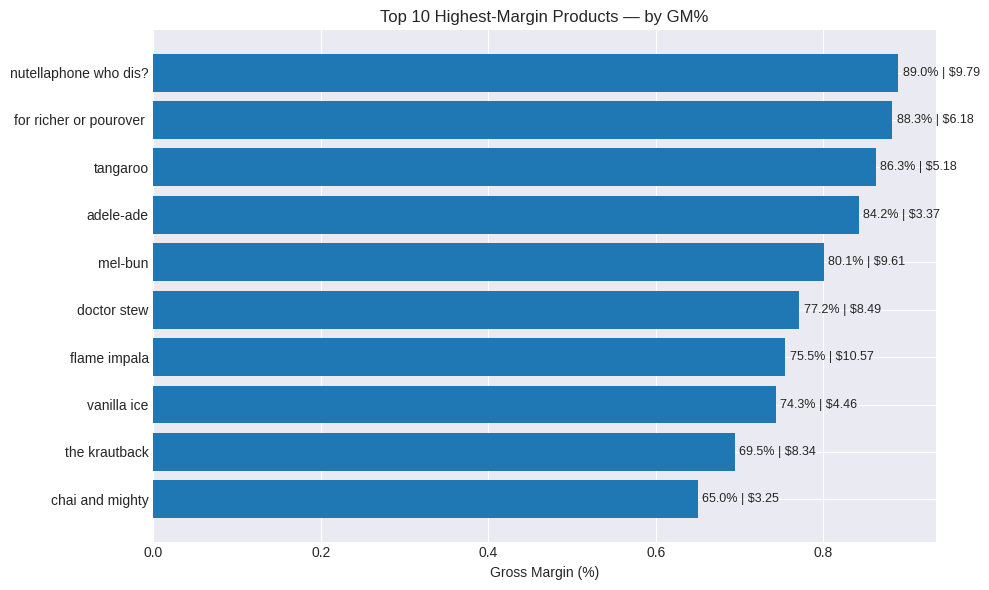

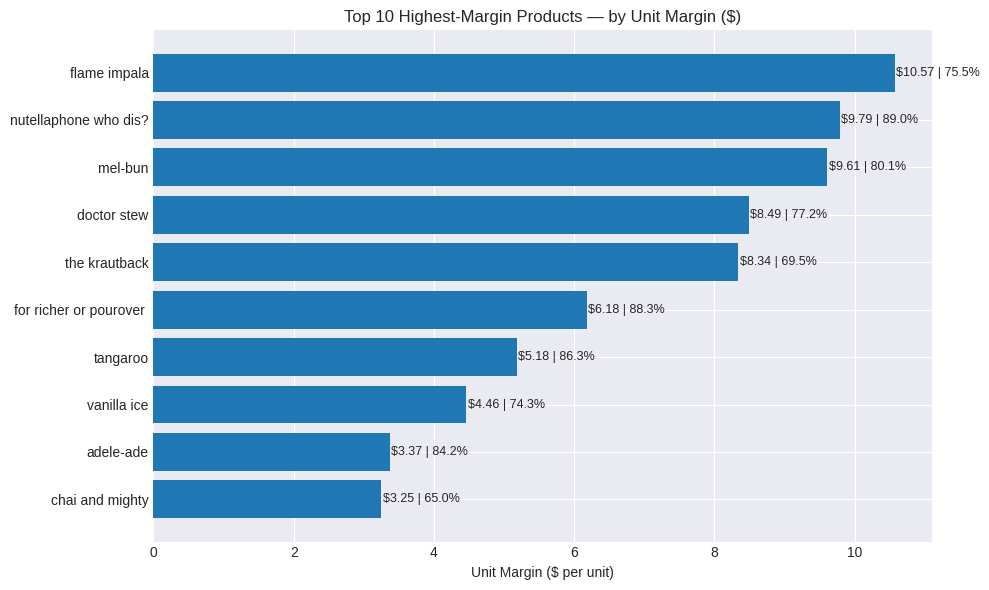

In [ ]:
#Promote High-Margin “Hero” Products through Bundles

supplies_by_sku = (
    supplies
    .with_columns(pl.col("cost").cast(pl.Float64))
    .group_by("sku")
    .agg(pl.col("cost").sum().alias("supply_cost_cents"))
)

product_margins = (
    products
    .with_columns(pl.col("price").cast(pl.Float64).alias("price_cents"))
    .join(supplies_by_sku, on="sku", how="left")
    .with_columns(pl.col("supply_cost_cents").fill_null(0.0))
    .with_columns([
        (pl.col("price_cents") / 100.0).alias("price_usd"),
        (pl.col("supply_cost_cents") / 100.0).alias("supply_cost_usd"),
    ])
    .with_columns([
        (pl.col("price_usd") - pl.col("supply_cost_usd")).alias("unit_margin"),
        pl.when(pl.col("price_usd") > 0)
          .then((pl.col("price_usd") - pl.col("supply_cost_usd")) / pl.col("price_usd"))
          .otherwise(0.0)
          .alias("margin_pct")
    ])
    .select(["sku","name","type","price_usd","supply_cost_usd","unit_margin","margin_pct"])
)

highest_margin_products = (
    product_margins
    .sort(["margin_pct","unit_margin"], descending=[True, True])
    .head(10)
)

print("Top 10 Highest-Margin Products:")
for r in highest_margin_products.iter_rows(named=True):
    print(f"{r['name']} ({r['sku']}) | GM%: {r['margin_pct']:.1%} | Unit Margin: ${r['unit_margin']:,.2f}")

plt.figure(figsize=(10, 6))
bars = plt.barh(highest_margin_products["name"], highest_margin_products["margin_pct"])
plt.xlabel("Gross Margin (%)")
plt.title("Top 10 Highest-Margin Products — by GM%")
plt.gca().invert_yaxis()

for bar, gm, um in zip(bars, highest_margin_products["margin_pct"], highest_margin_products["unit_margin"]):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{gm:.1%} | ${um:,.2f}", va="center", fontsize=9)
plt.tight_layout()
plt.show()

top_by_unit = product_margins.sort("unit_margin", descending=True).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_by_unit["name"], top_by_unit["unit_margin"])
plt.xlabel("Unit Margin ($ per unit)")
plt.title("Top 10 Highest-Margin Products — by Unit Margin ($)")
plt.gca().invert_yaxis()

for bar, um, gm in zip(bars, top_by_unit["unit_margin"], top_by_unit["margin_pct"]):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
             f"${um:,.2f} | {gm:.1%}", va="center", fontsize=9)
plt.tight_layout()
plt.show()


### Recommendation 3:

Prioritize expansion in Brooklyn

shape: (2, 6)
┌─────────────────────────┬──────────────┬──────────┬───────────────┬────────────┬─────────────────┐
│ store_id                ┆ name         ┆ tax_rate ┆ total_revenue ┆ total_days ┆ revenue_per_day │
│ ---                     ┆ ---          ┆ ---      ┆ ---           ┆ ---        ┆ ---             │
│ str                     ┆ str          ┆ f64      ┆ i64           ┆ i64        ┆ f64             │
╞═════════════════════════╪══════════════╪══════════╪═══════════════╪════════════╪═════════════════╡
│ a2a24e87-dec8-4f5d-9c9e ┆ Brooklyn     ┆ 0.04     ┆ 55251753      ┆ 173        ┆ 319374.294798   │
│ -0e9849…                ┆              ┆          ┆               ┆            ┆                 │
│ a9128331-08d7-41a2-b615 ┆ Philadelphia ┆ 0.06     ┆ 101963684     ┆ 365        ┆ 279352.558904   │
│ -21283e…                ┆              ┆          ┆               ┆            ┆                 │
└─────────────────────────┴──────────────┴──────────┴───────────────┴────────

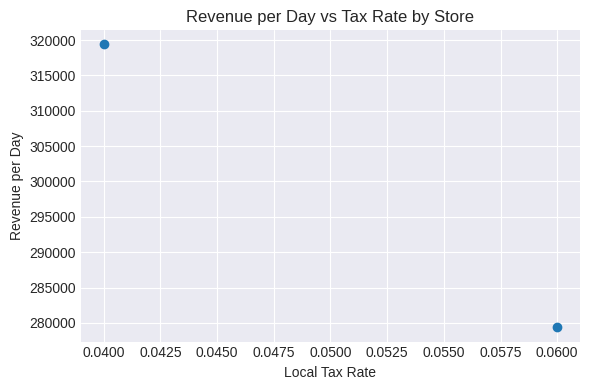

In [ ]:
# Align Store Strategy with Local Tax Rates

# Load datasets directly from GitHub
base_url = "https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-4/main/data/"
items = pl.read_csv(base_url + "Items.csv")
orders = pl.read_csv(base_url + "Orders.csv")
stores = pl.read_csv(base_url + "Stores.csv")
products = pl.read_csv(base_url + "Products.csv") # Added products as it might be needed

# Revenue per day since opening (from Q3.1)
# Re-calculate revenue per day by store since the previous attempt had errors
order_details = (
    items
    .join(orders.select(["id", "store_id", "ordered_at", "order_total"]), left_on="order_id", right_on="id", how="left")
)

stores_renamed = stores.rename({"id": "store_id"})

line_items_with_store = order_details.join(stores_renamed.select(["store_id", "opened_at", "name", "tax_rate"]), on="store_id", how="left")

line_items_with_store = line_items_with_store.with_columns([
    pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date).alias("order_date"),
    pl.col("opened_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date).alias("opening_date")
])

line_items_with_store = line_items_with_store.with_columns(
    ((pl.col("order_date") - pl.col("opening_date")).dt.total_days().cast(pl.Int64) + 1)
    .alias("days_since_opening")
)

revenue_per_day_by_store = (
    line_items_with_store.group_by(["store_id", "name", "tax_rate"])
    .agg([
        pl.col("order_total").sum().alias("total_revenue"),
        pl.col("days_since_opening").max().alias("total_days")
    ])
    .with_columns((pl.col("total_revenue") / pl.col("total_days")).alias("revenue_per_day"))
    .sort("revenue_per_day", descending=True)
)


print(revenue_per_day_by_store)

# Scatter plot: Revenue per Day vs Tax Rate
plt.figure(figsize=(6,4))
plt.scatter(revenue_per_day_by_store["tax_rate"], revenue_per_day_by_store["revenue_per_day"])
plt.title("Revenue per Day vs Tax Rate by Store")
plt.xlabel("Local Tax Rate")
plt.ylabel("Revenue per Day")
plt.tight_layout()
plt.show()

## Executive Summary

After careful review a comprehensive analysis of Jaffle Shops performance reveals key revenue drivers and opportunities to enhance profitability. Beverages dominate sales, weekday orders generate stronger returns than weekends, and store performance varies significantly by location. Based on these insights, three strategic recommendations are proposed to expand high-performing categories, strengthen customer engagement, and guide store investment decisions.

### Key Findings:
1. Beverages Lead Revenue: Beverages generate approximately 60% of sales ($95.18M), compared to $62.03M for jaffles, while both categories maintain exceptionally high gross margins (>95%).
2. Weekday Profitability: Weekdays generate nearly double the revenue of weekends, with larger basket sizes producing 4-6x higher average profits per order.
3. High-Margin Products:  Products such as Nutellaphone who dis? (89% GM, $9.79/unit) and Flame Impala ($10.57/unit, 75% GM) deliver outsized profitability.Beverages like Tangaroo (86% GM) and For Richer or Pourover (88% GM) also stand out as margin leaders.
4. Brooklyn Market Outperformance: Brooklyn delivers $131.9K/day in revenue vs. Philadelphia’s $118.3/day, a 11.4% advantage.

### Strategic Recommendations:
1.  Promote High-Margin “Hero” Products through Bundles
- Rationale: Certain products deliver both strong gross margins and high unit profit. Flame Impala ($10.57/unit, 75% GM) and Nutellaphone who dis? ($9.79/unit, 89% GM) are top unit-profit drivers, while beverages like Tangaroo (86% GM) and For Richer or Pourover (88% GM) lead in margin efficiency.
- Action: Feature these products in promotions and bundle high-unit-margin jaffles with high-GM% beverages to maximize per-order profitability.

2. Drive Weekday Sales & Basket Size
- Rationale: Weekdays yield higher sales and profits due to larger orders.
- Action: Introduce weekday loyalty rewards, lunchtime bundle deals, and incentives for multi-item purchases.
- Impact: Boosts weekday traffic and lifts profitability by maximizing larger, more profitable baskets.

3. Align Store Strategy with Local Tax Rates
- Rationale: Store revenue per day shows clear variation, while local tax rates may also influence sales and profitability.
- Action: Apply best practices from high-performing stores and refine pricing or promotions in locations with higher tax burdens.
- Impact: Improves profitability, strengthens store-level decision-making, and informs strategies for future market development.

### Conclusion:
The analysis makes clear that Jaffle Shop’s growth depends on sharpening its product strategy, capitalizing on customer behavior, and aligning investment with market strength. By promoting high-margin hero products, driving weekday basket growth, and expanding in Brooklyn’s stronger market, the business can increase profitability while diversifying revenue sources. These initiatives not only maximize current strengths but also create a sustainable foundation for scaling operations and maintaining competitive advantage.